In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix,
    accuracy_score, roc_auc_score, roc_curve
)
from scipy.stats import skew
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [22]:
url_train = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
url_test = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test"

columns = [
    "age", "workclass", "fnlwgt", "education", "education-num",
    "marital-status", "occupation", "relationship", "race", "sex",
    "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"
]

In [23]:
train_data = pd.read_csv(url_train, header=None, names=columns, na_values=" ?", skipinitialspace=True)
test_data = pd.read_csv(url_test, header=0, names=columns, na_values=" ?", skipinitialspace=True, comment='|')

# دمج البيانات
data = pd.concat([train_data, test_data], ignore_index=True)

In [24]:
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48841 non-null  int64 
 1   workclass       48841 non-null  object
 2   fnlwgt          48841 non-null  int64 
 3   education       48841 non-null  object
 4   education-num   48841 non-null  int64 
 5   marital-status  48841 non-null  object
 6   occupation      48841 non-null  object
 7   relationship    48841 non-null  object
 8   race            48841 non-null  object
 9   sex             48841 non-null  object
 10  capital-gain    48841 non-null  int64 
 11  capital-loss    48841 non-null  int64 
 12  hours-per-week  48841 non-null  int64 
 13  native-country  48841 non-null  object
 14  income          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [26]:
data.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48841.000000,4.884100e+04,48841.000000,48841.000000,48841.000000,48841.000000
mean,38.643865,1.896634e+05,10.078152,1079.089720,87.504105,40.422391
std,13.710511,1.056050e+05,2.570961,7452.093748,403.008483,12.391571
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175490e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781420e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376460e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
data.shape

(48841, 15)

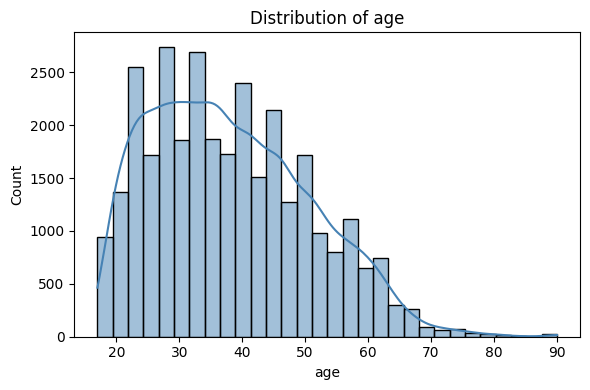

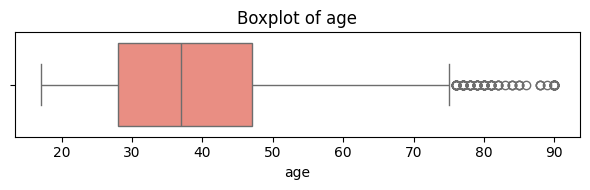

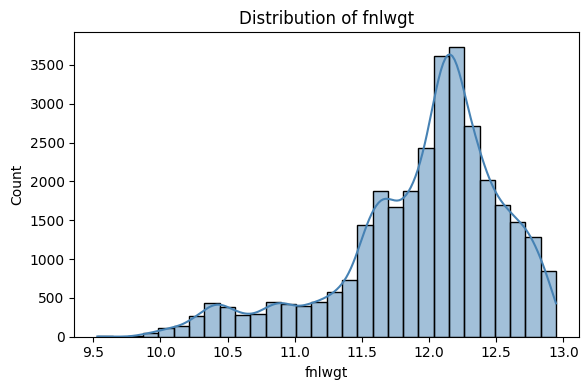

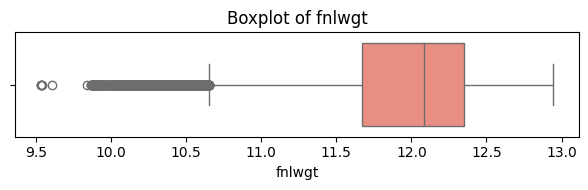

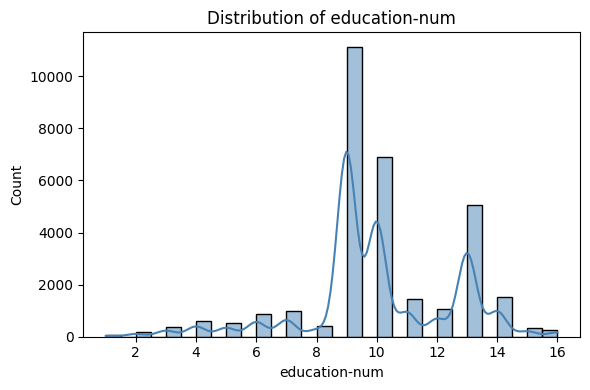

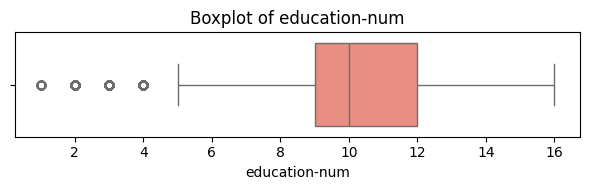

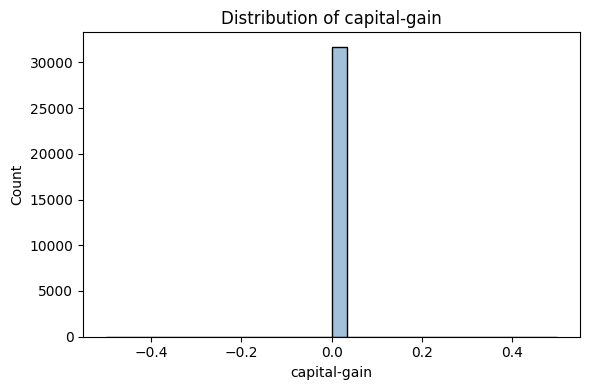

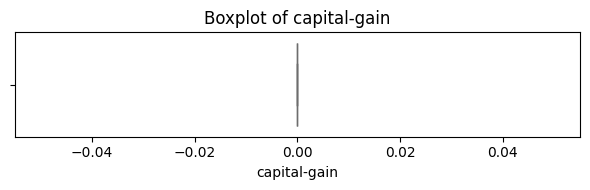

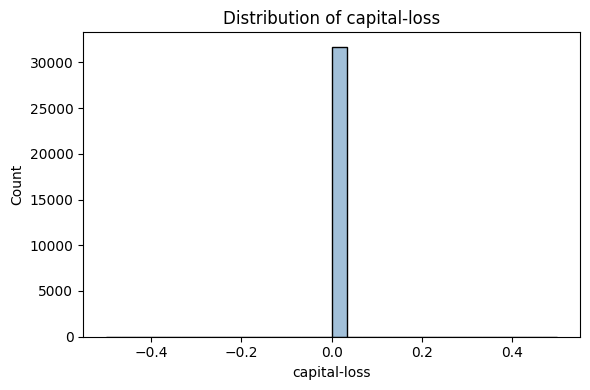

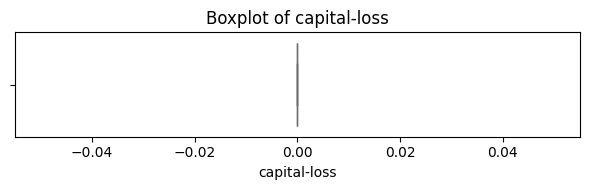

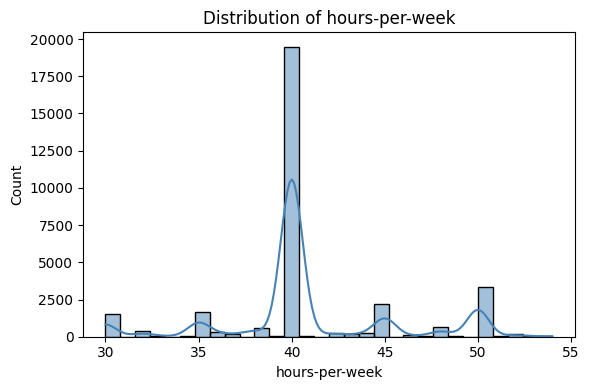

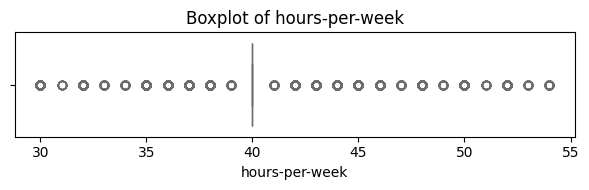

In [28]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='steelblue')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(6, 2))
    sns.boxplot(x=data_cleaned[col], color='salmon')
    plt.title(f"Boxplot of {col}")
    plt.tight_layout()
    plt.show()

In [29]:
data_cleaned = data.dropna()

In [30]:
data_cleaned['income'] = data_cleaned['income'].apply(lambda x: 1 if '>50K' in x else 0)

In [31]:
# age	عمر الشخص
# workclass	فئة العمل (حكومي، خاص، بدون عمل...)
# fnlwgt	وزن العينة (يستخدم لتقدير عدد الأشخاص بهذا الوصف في السكان)
# education	مستوى التعليم (بكالوريوس، ثانوية...)
# education-num	التعليم كرقم (يُمثّل عدد سنوات الدراسة)
# marital-status	الحالة الاجتماعية (متزوج، أعزب...)
# occupation	المهنة (مدير، فني...)
# relationship	العلاقة في العائلة (زوج، ابن،...)
# race	العرق
# sex	الجنس
# capital-gain	الأرباح من رأس المال (مثلاً من بيع أصول)
# capital-loss	الخسائر من رأس المال
# hours-per-week	عدد ساعات العمل في الأسبوع
# native-country	بلد المنشأ
# income	الفئة المستهدفة: هل الدخل >50K؟ (تم تحويلها إلى 0/1)

In [32]:
numerical_cols = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

In [33]:
def remove_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

for col in ['capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']:
    data_cleaned = remove_outliers_iqr(data_cleaned, col)

# تحويل القيم المنحرفة (log transform)
for col in ['capital-gain', 'capital-loss', 'fnlwgt']:
    data_cleaned[col] = np.log1p(data_cleaned[col])

In [34]:
# ترميز One-Hot للأعمدة الفئوية
categorical_cols = data_cleaned.select_dtypes(include='object').columns
data_encoded = pd.get_dummies(data_cleaned, columns=categorical_cols)

In [35]:
scaler = StandardScaler()
data_encoded[numerical_cols] = scaler.fit_transform(data_encoded[numerical_cols])

In [36]:
X = data_encoded.drop('income', axis=1)
y = data_encoded['income']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [38]:
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_log))

Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5099
           1       0.69      0.49      0.57      1241

    accuracy                           0.86      6340
   macro avg       0.79      0.72      0.74      6340
weighted avg       0.85      0.86      0.85      6340



In [39]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5099
           1       0.61      0.49      0.54      1241

    accuracy                           0.84      6340
   macro avg       0.75      0.71      0.72      6340
weighted avg       0.83      0.84      0.83      6340



/tmp/ipython-input-2824148112.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[indices][:top_n], y=feature_names[indices][:top_n], palette="viridis")


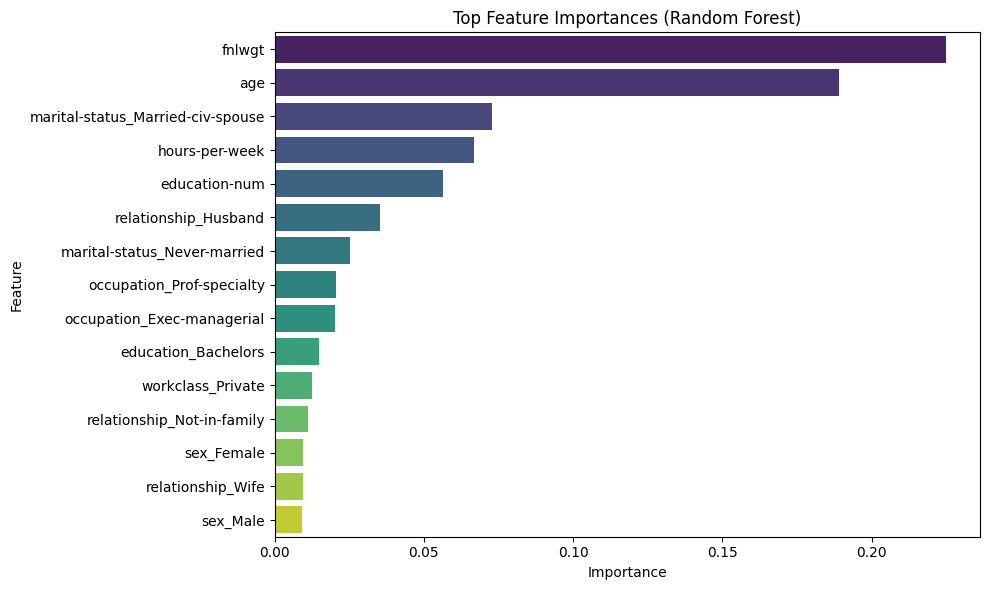

In [40]:
importances = rf_model.feature_importances_
feature_names = X_train.columns
indices = np.argsort(importances)[::-1]

top_n = 15
plt.figure(figsize=(10, 6))
plt.title("Top Feature Importances (Random Forest)")
sns.barplot(x=importances[indices][:top_n], y=feature_names[indices][:top_n], palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

Logistic Regression AUC: 0.8917957084694839
Random Forest AUC: 0.861660634347257


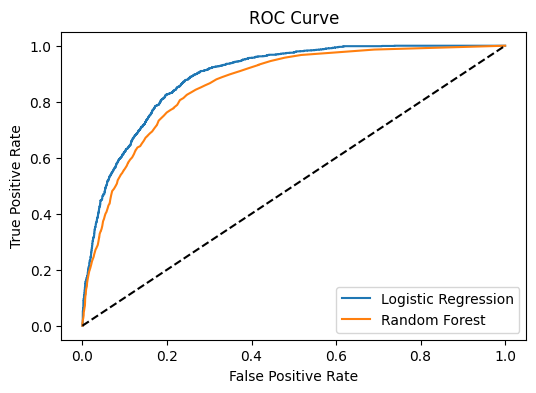

In [41]:
print("Logistic Regression AUC:", roc_auc_score(y_test, log_model.predict_proba(X_test)[:,1]))
print("Random Forest AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

fpr1, tpr1, _ = roc_curve(y_test, log_model.predict_proba(X_test)[:,1])
fpr2, tpr2, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:,1])

plt.figure(figsize=(6, 4))
plt.plot(fpr1, tpr1, label="Logistic Regression")
plt.plot(fpr2, tpr2, label="Random Forest")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [44]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42)
}


Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5099
           1       0.69      0.49      0.57      1241

    accuracy                           0.86      6340
   macro avg       0.79      0.72      0.74      6340
weighted avg       0.85      0.86      0.85      6340


Random Forest Results:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90      5099
           1       0.61      0.49      0.54      1241

    accuracy                           0.84      6340
   macro avg       0.75      0.71      0.72      6340
weighted avg       0.83      0.84      0.83      6340


Decision Tree Results:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      5099
           1       0.48      0.50      0.49      1241

    accuracy                           0.80      6340
   macro avg       0.68      0.68      0.68      6

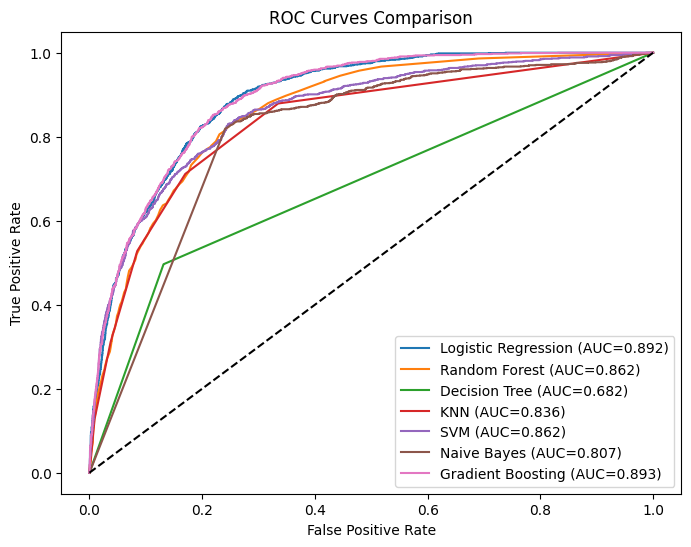

In [45]:
results = {}
roc_curves = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:,1] if hasattr(model, "predict_proba") else None

    print(f"\n{name} Results:")
    print(classification_report(y_test, y_pred))

    auc = roc_auc_score(y_test, y_prob) if y_prob is not None else None
    results[name] = auc

    if y_prob is not None:
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_curves[name] = (fpr, tpr)

plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={results[name]:.3f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves Comparison")
plt.legend()
plt.show()

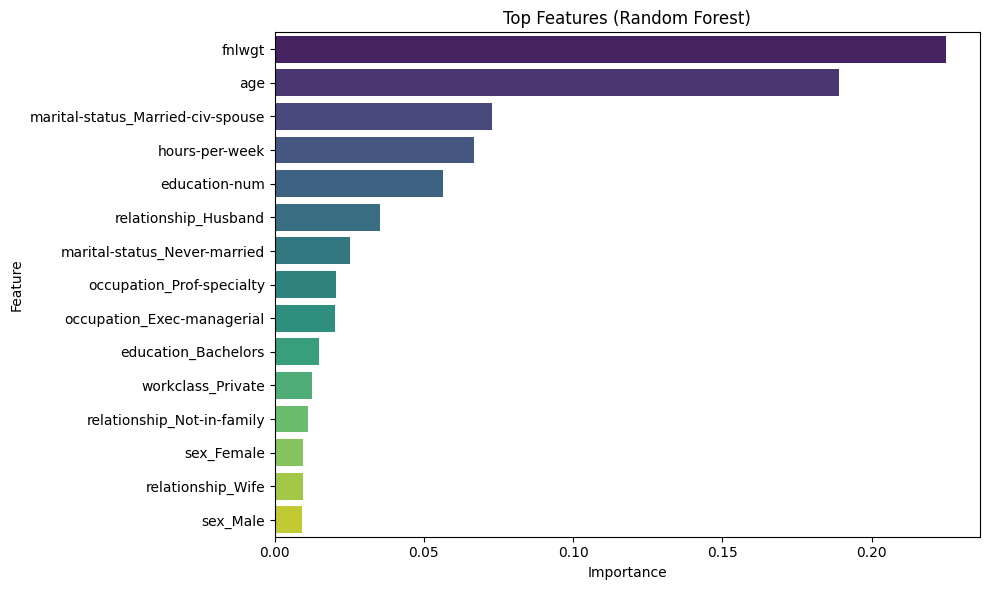

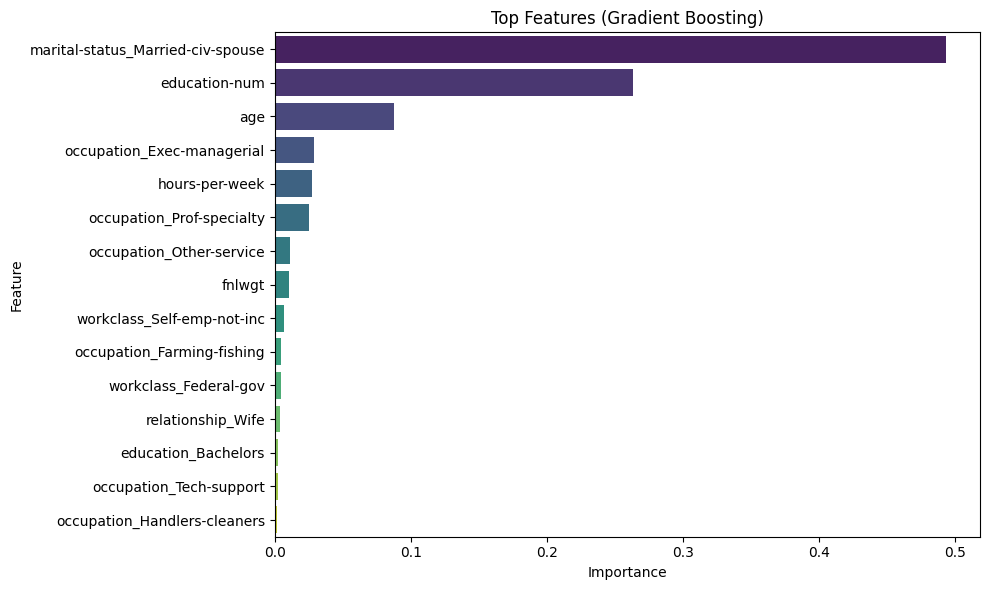

In [46]:
for model_name in ["Random Forest", "Gradient Boosting"]:
    model = models[model_name]
    if hasattr(model, "feature_importances_"):
        importances = model.feature_importances_
        indices = np.argsort(importances)[::-1]
        top_n = 15
        plt.figure(figsize=(10, 6))
        plt.title(f"Top Features ({model_name})")
        sns.barplot(x=importances[indices][:top_n], y=X_train.columns[indices][:top_n], palette="viridis")
        plt.xlabel("Importance")
        plt.ylabel("Feature")
        plt.tight_layout()
        plt.show()